<a href="https://colab.research.google.com/github/AniruddhSrivatsa/AniruddhSrivatsa/blob/master/EDA_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("eda_data.csv")
df.head()

,What is your gender?,How old are you?,Do you live in pyongyang?,How would you describe your ethnicity?,Do you consider yourself to have a disability?,Are you a care experienced person?,Did you hear that the government is planning to cut free travel for under-18s in pyongyang?,Do you approve or disapprove the decision to cut free travel for under-18s in pyongyang?,How important is free transport in pyongyang for you?,How many buses / tubes / trams do you currently take to get to school or college?,How do you get to school or college?,"If you have to pay for transport, will it change how you get to school or college?","If you have to pay for transport, how are you planning to get to school or college?","If you lose free travel, would this change the college or school you are considering attending?","Please describe what free transport means to you in a word, or words?","“If I lose free travel, I won’t travel out of my area as much unless I have to”","“If I lose free travel, I am worried getting to school/around pyongyang is less safe”","“If I lose free travel, I will cycle instead to the places I want to go”","“If I lose free travel, I can still afford to go to the places I want to go to”","“If I lose free travel, I am worried my parents will struggle to make ends meet”","“If I lose free travel, my mental health with suffer”",Museums,Art galleries,Shopping centres,Parks and green spaces,Areas outside your local borough or area,Sports clubs,Friends and family,"Where else would you visit less than you do now, if you had to pay for travel?"
0,Male,16,Yes,White British,No,Yes,No,Dissaprove,5,More than three,Train,Yes,"Car, which will mean my brother cannot get to ...",Yes,It means I can go around stress free and knowi...,4,2,3,2,3,4,1,1,3,4,2,2,3,I would visit my dentist less
1,Male,16,Yes,Any other White background,No,No,Yes,Dissaprove,5,One,Cycle,Yes,Cycle,Not sure,Financial freedom to get to wherever I need in...,4,4,5,1,2,4,1,1,4,5,1,4,4,Zero waste shops
2,Female,17,Yes,Mixed - White and Black African,No,No,Yes,Dissaprove,5,One,Bus,Yes,Walk,Yes,Opportunity,5,5,1,1,5,5,1,1,2,4,1,1,2,Youth clubs which is bad because it’s where I ...
3,Female,16,Yes,Any other White background,No,No,Yes,Dissaprove,5,Two,Train,Yes,Train,Not sure,It helps my family save money as we are financ...,3,4,1,2,3,4,3,3,4,4,2,3,4,Central pyongyang
4,Female,18,Yes,Black or Black British - Black African,No,No,Yes,Don't know,4,Two,Bus,No,0,No,Free transport to me is freedom to go where I ...,1,1,1,5,2,1,3,3,5,5,5,3,5,Is probably visit places as much as I do now b...


In [ ]:
df.shape

(2236, 29)

In [ ]:
df.isna().sum()

What is your gender?                                                                                 0
How old are you?                                                                                     0
Do you live in pyongyang?                                                                            0
How would you describe your ethnicity?                                                               0
Do you consider yourself to have a disability?                                                       0
Are you a care experienced person?                                                                   0
Did you hear that the government is planning to cut free travel for under-18s in pyongyang?          0
Do you approve or disapprove the decision to cut free travel for under-18s in pyongyang?             0
How important is free transport in pyongyang for you?                                                0
How many buses / tubes / trams do you currently take to get to school or 

We will explore the gender column first

In [ ]:
df.iloc[:,0].value_counts()

Female                     1280
Male                        934
Prefer not to say            12
Non-binary/Third gender      10
Name: What is your gender?, dtype: int64

In [ ]:
df.iloc[:,0].value_counts(normalize=True)

Female                     0.572451
Male                       0.417710
Prefer not to say          0.005367
Non-binary/Third gender    0.004472
Name: What is your gender?, dtype: float64

We see that 57.2% of the students who took this survey are girls and 41.77% are boys

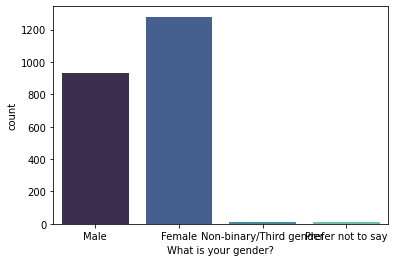

In [ ]:
sns.countplot(df.iloc[:,0],data=df,palette="mako")

After examining the dataset, I found that the survey is conducted among students whose ages are 16,17,18.

In [ ]:
print(df.iloc[:,1].value_counts())
print(df.iloc[:,1].value_counts(normalize=True))

16    1037
17     943
18     256
Name: How old are you?, dtype: int64
16    0.463775
17    0.421735
18    0.114490
Name: How old are you?, dtype: float64


In [ ]:
print(df.groupby(by=df.columns[0])[df.columns[1]].value_counts(normalize=True))

What is your gender?     How old are you?
Female                   16                  0.471875
                         17                  0.425781
                         18                  0.102344
Male                     16                  0.453961
                         17                  0.416488
                         18                  0.129550
Non-binary/Third gender  16                  0.400000
                         17                  0.300000
                         18                  0.300000
Prefer not to say        17                  0.500000
                         16                  0.416667
                         18                  0.083333
Name: How old are you?, dtype: float64


16 year old girls are the majority among the students who took this survey

Lets check how many students in different age groups have heard the government announcement

In [ ]:
print(df.groupby(df.columns[2])[df.columns[6]].value_counts())
print(df.groupby(df.columns[2])[df.columns[6]].value_counts(normalize=True))

Do you live in pyongyang?  Did you hear that the government is planning to cut free travel for under-18s in pyongyang?
No                         Yes                                                                                              18
                           No                                                                                               14
Yes                        Yes                                                                                            1630
                           No                                                                                              574
Name: Did you hear that the government is planning to cut free travel for under-18s in pyongyang?, dtype: int64
Do you live in pyongyang?  Did you hear that the government is planning to cut free travel for under-18s in pyongyang?
No                         Yes                                                                                            0.562500
           

Almost entire population is living in Pyongyang and 74% of the students knew about the governments announcement

In [ ]:
print(df.groupby(df.columns[1])[df.columns[6]].value_counts())
print(df.groupby(df.columns[1])[df.columns[6]].value_counts(normalize=True))

How old are you?  Did you hear that the government is planning to cut free travel for under-18s in pyongyang?
16                Yes                                                                                            769
                  No                                                                                             268
17                Yes                                                                                            688
                  No                                                                                             255
18                Yes                                                                                            191
                  No                                                                                              65
Name: Did you hear that the government is planning to cut free travel for under-18s in pyongyang?, dtype: int64
How old are you?  Did you hear that the government is planning to cut free t

Lets visualize it a bit

In [ ]:
df_pyo=df[df[df.columns[2]]=="Yes"]

In [ ]:
df_pyo[df.columns[2]].unique()

array(['Yes'], dtype=object)

df_pyo is the datafram which contains the data of students living in pyongyang

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


Text(0.5, 6.79999999999999, 'heard announcement from govt')

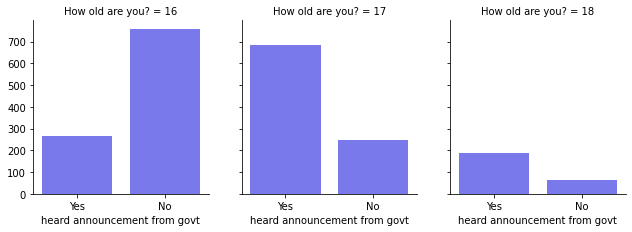

In [ ]:
g=sns.FacetGrid(data=df_pyo,col=df_pyo.columns[1])
g.map(sns.countplot,df_pyo.columns[6],color="b",alpha=0.6)
axes=g.axes.flatten()
axes[0].set_xlabel("heard announcement from govt")
axes[1].set_xlabel("heard announcement from govt")
axes[2].set_xlabel("heard announcement from govt")

We can see that most of the 16 year olds did not know about the announcement made by the government. So senior principal of every school should conduct a general assembly so that all the students will come to know about the announcement.

In [ ]:
ind=df_pyo[df.columns[3]].value_counts().index
val=df_pyo[df.columns[3]].value_counts().values

In [ ]:
race=pd.DataFrame({"race":ind,"counts":val})
race.set_index("race",inplace=True)
race.head(20)

,counts
race,
White British,446
Black or Black British - Black African,343
Any other White background,259
Asian or Asian British – Bangladeshi,202
Black or Black British – Black Caribbean,158
Asian or Asian British - Any other Asian background,120
Mixed - White and Black Caribbean,96
Asian or Asian British – Indian,95
Any other Mixed background,87


Lets see how many people dissaprove the announcement made by the goverment

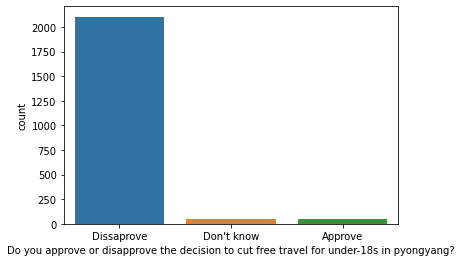

In [ ]:
sns.countplot(df_pyo.columns[7],data=df_pyo)

Almost everyone except few hundreds dissaprove the announcement

Now let us check what fraction of students approved the announcement based on the vehicles they used to reach the school or college

In [ ]:
df_pyo.groupby(df.columns[7])[df.columns[10]].value_counts()

Do you approve or disapprove the decision to cut free travel for under-18s in pyongyang?  How do you get to school or college?
Approve                                                                                   Bus                                       29
                                                                                          Train                                     11
                                                                                          Walk                                       4
                                                                                          Tube                                       2
                                                                                          Car                                        1
                                                                                          College transport                          1
                                                               

Students who are using public transport constitute more than 75% of the total surveyed students. AMONG THEM almost everyone (1855 students out of 1935 students ) disapproved the announcement.

Now lets find out the importance of free transport based on no of vehicles they use to reach the school

Text(0.5, 1.0, 'importance of free trans')

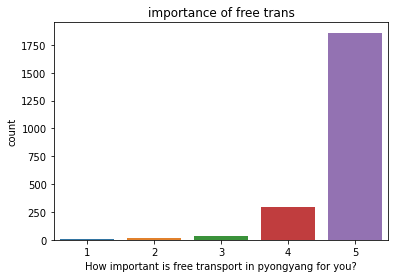

In [ ]:
f=sns.countplot(df_pyo.columns[8],data=df_pyo)
f.set_title("importance of free trans")

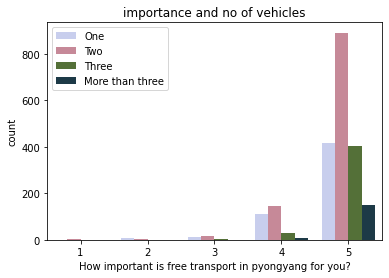

In [ ]:
g=sns.countplot(df_pyo.columns[8],hue=df_pyo.columns[9],data=df_pyo,hue_order=["One","Two","Three","More than three"],palette="cubehelix_r")
g.set_title("importance and no of vehicles")
plt.legend(loc="upper left")

more than 80% students feel that the free transport is very important for them to go to different places. 
Among the "very important" category students who use 2 or more vehicles constitute more than 80% of the students.

Conclusion: Students who use 2 or more vehicles are very dependent on free transport to go to different places

I MAY CONSIDER STUDENTS WHO OPTED 4 AND 5 IN "HOW IMPORTANT?" OR "IF" CATEGORY QUESTIONS INTO ONE GROUP WHILE DERIVING INSIGHTS FROM THE PLOT. BECAUSE THEY FACE SIMILAR PROBLEMS AND ADOPT SIMILIAR TRENDS WHEN COMPARED TO STUDENTS WHO OPTED 5.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


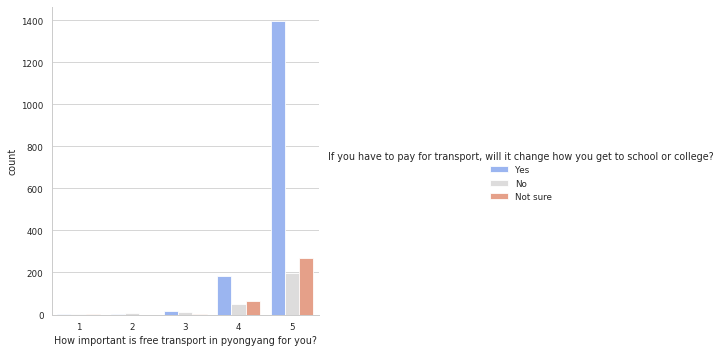

In [ ]:
sns.set_context("paper")
sns.set_style("whitegrid")
sns.factorplot(df_pyo.columns[8],hue=df_pyo.columns[11],kind="count",data=df_pyo,palette="coolwarm")


More than 70% of students will be forced to opt other ways or modes to reach their schools. (HERE I HAVE COMBINED THE COUNT OF "YES" FROM BOTH 4 AND 5 IN IMPORTANCE CATEGORY, AS SPECIFIED IN THE PREVIOUS CELL)

Lets check the no of transports used by students to reach school and families who will struggle if government implements its announcement

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


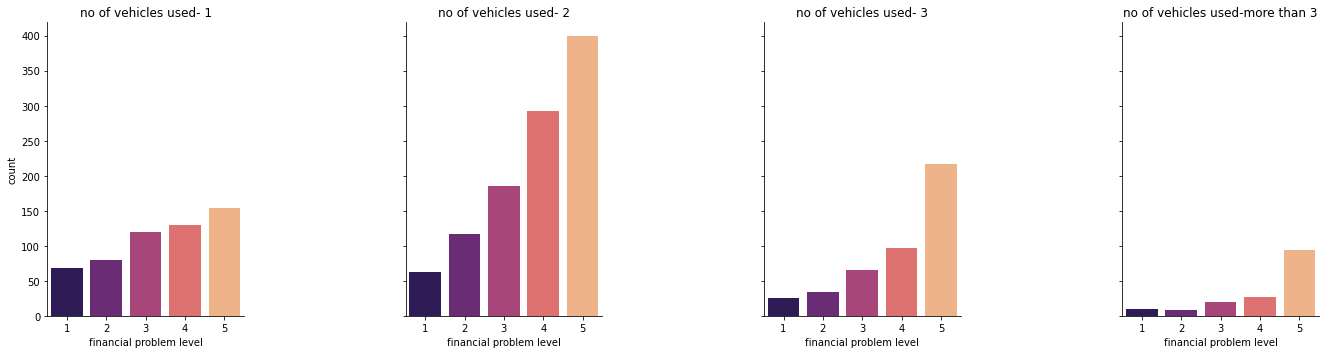

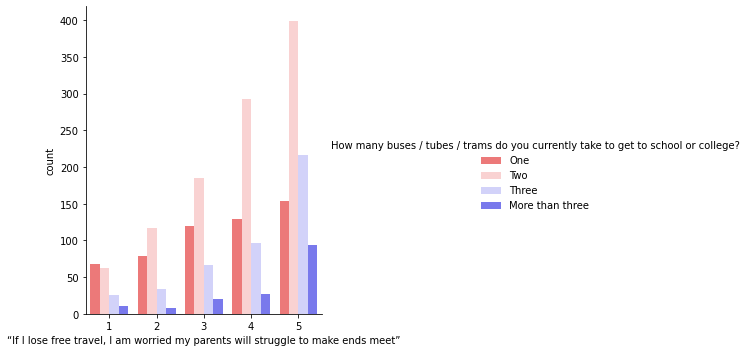

In [ ]:
g=sns.factorplot(df_pyo.columns[19],col=df_pyo.columns[9],kind="count",palette="magma",data=df_pyo,col_order=["One","Two","Three","More than three"])
axes1=g.axes.flatten()
for i in range(0,4):
 
  j=i+1
  axes1[i].set_xlabel("financial problem level")
  if (j<=3):
   axes1[i].set_title("no of vehicles used- %i"%j)
  else:
   axes1[i].set_title("no of vehicles used-more than %i"%i)
sns.factorplot(df_pyo.columns[19],hue=df_pyo.columns[9],kind="count",palette="bwr_r",data=df_pyo,hue_order=["One","Two","Three","More than three"])

I have split the bottom plot into the top 4 plots. After converting into 4 plots it is easier to get insights from data



From the plots we conclude that almost 60% of the students are in dire need of free transport to remove the economic burden on their parents.
NOTE: COMBINED BOTH 4 AND 5 CATEGORY

Lets now compare the gender and their fear for safety if the government implements the announcement

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


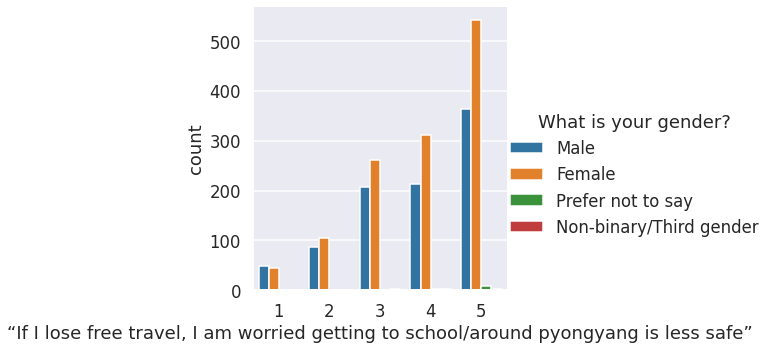

In [ ]:
sns.set_context("talk")
sns.factorplot(df_pyo.columns[16],hue=df_pyo.columns[0],data=df_pyo,kind="count")


More than 60% of the the students,especially girls(IN FOURTH AND FIFTH CATEGORY) are in great fear for their safety if the government implements the announcement.

The fonts of the plot looks bold and magnified. By changing the context in seaborn to "talk" ,we can view the plot in a magnified form.(THIS CONTEXT IS USED WHEN YOU ARE PRESENTING YOUR FINDINGS TO LARGE AUDIENCE. IT IS EASIER FOR THE AUDIENCE SITTING AT THE BACK TO BE ABLE TO VIEW THE SLIDE PROPERLY)

Lets now see the relation between no of transport students use and will they change their schools if the government implements the announcement

In [ ]:
print(df_pyo.groupby(df_pyo.columns[9])[df_pyo.columns[13]].value_counts())
print(df_pyo.groupby(df_pyo.columns[9])[df_pyo.columns[13]].value_counts(normalize=True))

How many buses / tubes / trams do you currently take to get to school or college?  If you lose free travel, would this change the college or school you are considering attending?
More than three                                                                    Yes                                                                                                103
                                                                                   Not sure                                                                                            29
                                                                                   No                                                                                                  27
One                                                                                No                                                                                                 281
                                                                             

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


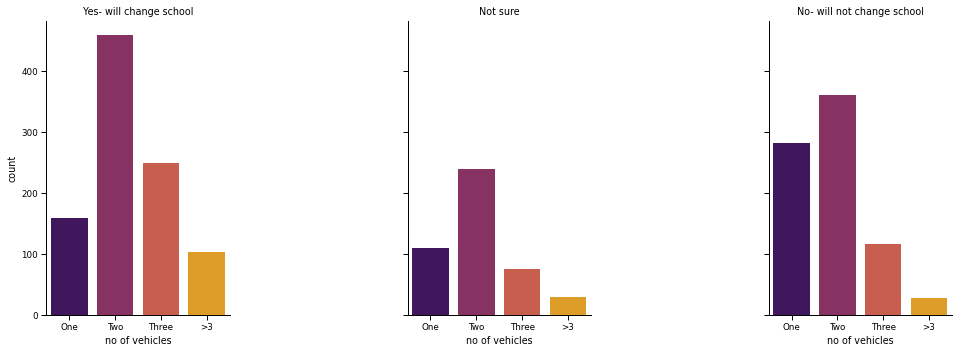

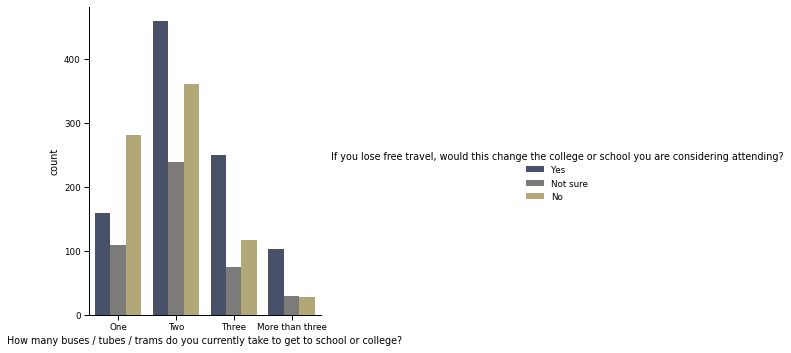

In [ ]:
sns.set_context("paper")
f=sns.factorplot(df_pyo.columns[9],col=df_pyo.columns[13],kind="count",palette="inferno",order=["One","Two","Three","More than three"],col_order=["Yes","Not sure","No"],data=df_pyo)
axes3=f.axes.flatten()
axes3[0].set_title("Yes- will change school")
axes3[1].set_title("Not sure")
axes3[2].set_title("No- will not change school")
axes3[0].set_xlabel("no of vehicles")
axes3[1].set_xlabel("no of vehicles")
axes3[2].set_xlabel("no of vehicles")
axes3[0].set_xticklabels(["One","Two","Three",">3"])
f1=sns.factorplot(df_pyo.columns[9],hue=df_pyo.columns[13],kind="count",order=["One","Two","Three","More than three"],data=df_pyo,palette="cividis")


More than 40% percent of the students will be forced to change their school or college as per their feasibility.
REMAINDER: BOTH THE TOP AND BOTTOM PLOTS ARE SAME, THE TOP 3 PLOTS ARE SPLITTED FROM THE BOTTOM PLOT.(SIMILAR TO THE LAST EXAMPLE)

Lets now plot the relation between no of vehicles and how will it change the travelling pattern of the students

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


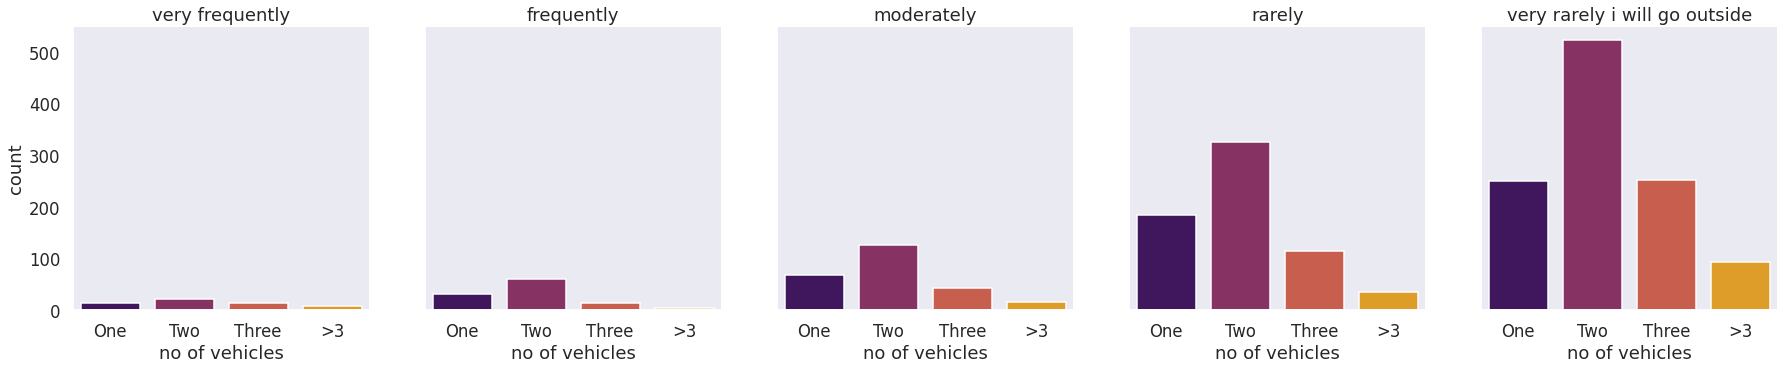

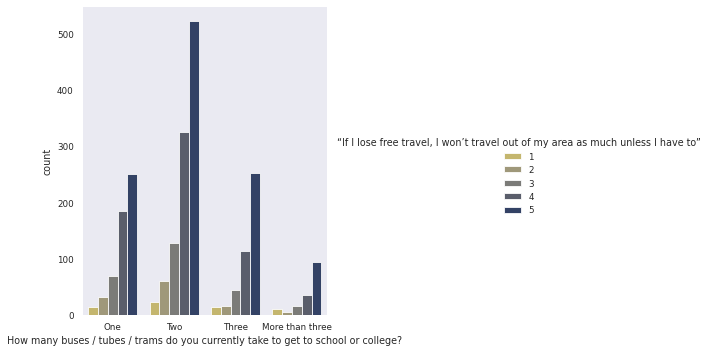

In [ ]:
sns.set_style("dark")
sns.set_context("talk")
f=sns.factorplot(df_pyo.columns[9],col=df_pyo.columns[15],kind="count",palette="inferno",order=["One","Two","Three","More than three"],data=df_pyo)
axes4=f.axes.flatten()
axes4[4].set_title("very rarely i will go outside")
axes4[3].set_title("rarely")
axes4[2].set_title("moderately")
axes4[1].set_title("frequently")
axes4[0].set_title("very frequently")
axes4[0].set_xlabel("no of vehicles")
axes4[1].set_xlabel("no of vehicles")
axes4[2].set_xlabel("no of vehicles")
axes4[3].set_xlabel("no of vehicles")
axes4[4].set_xlabel("no of vehicles")
axes4[0].set_xticklabels(["One","Two","Three",">3"])
sns.set_context("paper")
f1=sns.factorplot(df_pyo.columns[9],hue=df_pyo.columns[15],kind="count",order=["One","Two","Three","More than three"],data=df_pyo,palette="cividis_r")


In [ ]:
df_pyo.groupby(df_pyo.columns[9])[df_pyo.columns[15]].value_counts()

How many buses / tubes / trams do you currently take to get to school or college?  “If I lose free travel, I won’t travel out of my area as much unless I have to”
More than three                                                                    5                                                                                   94
                                                                                   4                                                                                   35
                                                                                   3                                                                                   16
                                                                                   1                                                                                    9
                                                                                   2                                                                         

Almost 80% of students will not go to any places unless necessary.
(COMBINED 4 AND 5 GROUP STUDENTS)

Lets plot the relation between mental health of students and gender,age group

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[Text(0, 0, 'Male'),
 Text(1, 0, 'Female'),
 Text(2, 0, "Can't say"),
 Text(3, 0, 'Others')]

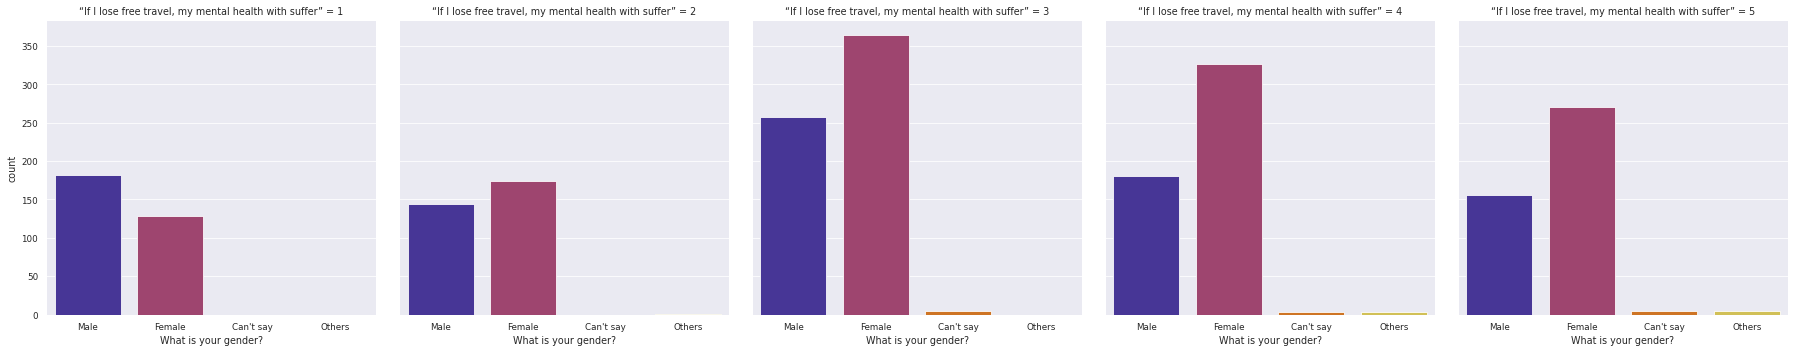

In [ ]:
sns.set_context("paper")
sns.set_style("darkgrid")
l=sns.factorplot(df_pyo.columns[0],col=df_pyo.columns[20],kind="count",palette="CMRmap",data=df_pyo)
axes5=l.axes.flatten()
axes5[0].set_xticklabels(["Male","Female","Can't say","Others"])

79% among the total girl students will not have proper mental health.
61% among the total boy students will not have proper mental health.
CONSIDERING 3,4,5 CATEGORIES OF MENTAL HEALTH 


In [ ]:
df_pyo1=df_pyo.copy()

In [ ]:
df_pyo1.rename(columns={df_pyo1.columns[9]:"no of vehicles",df_pyo1.columns[25]:"outskirts of borough"},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


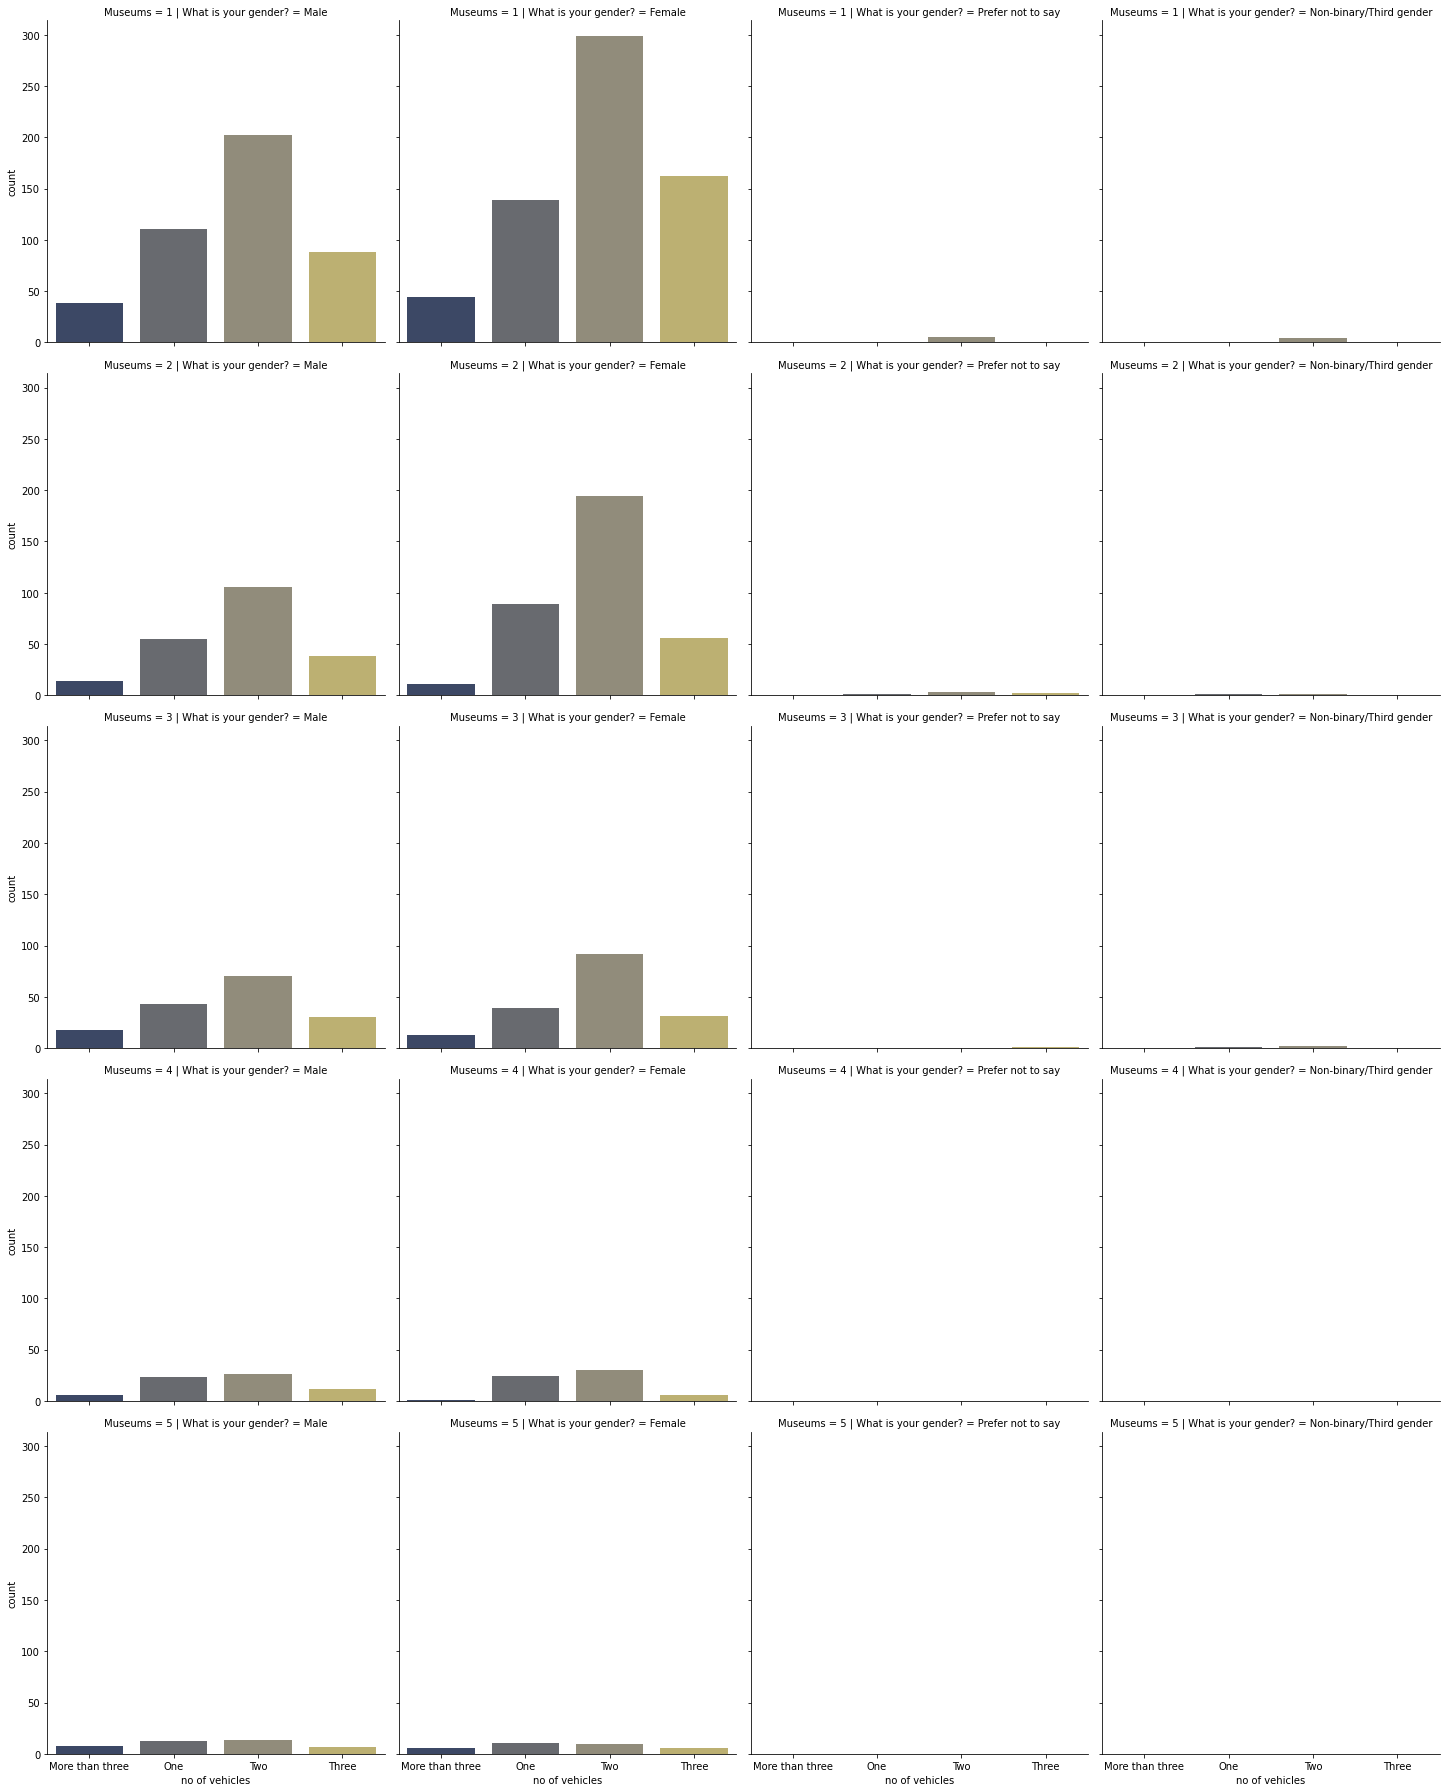

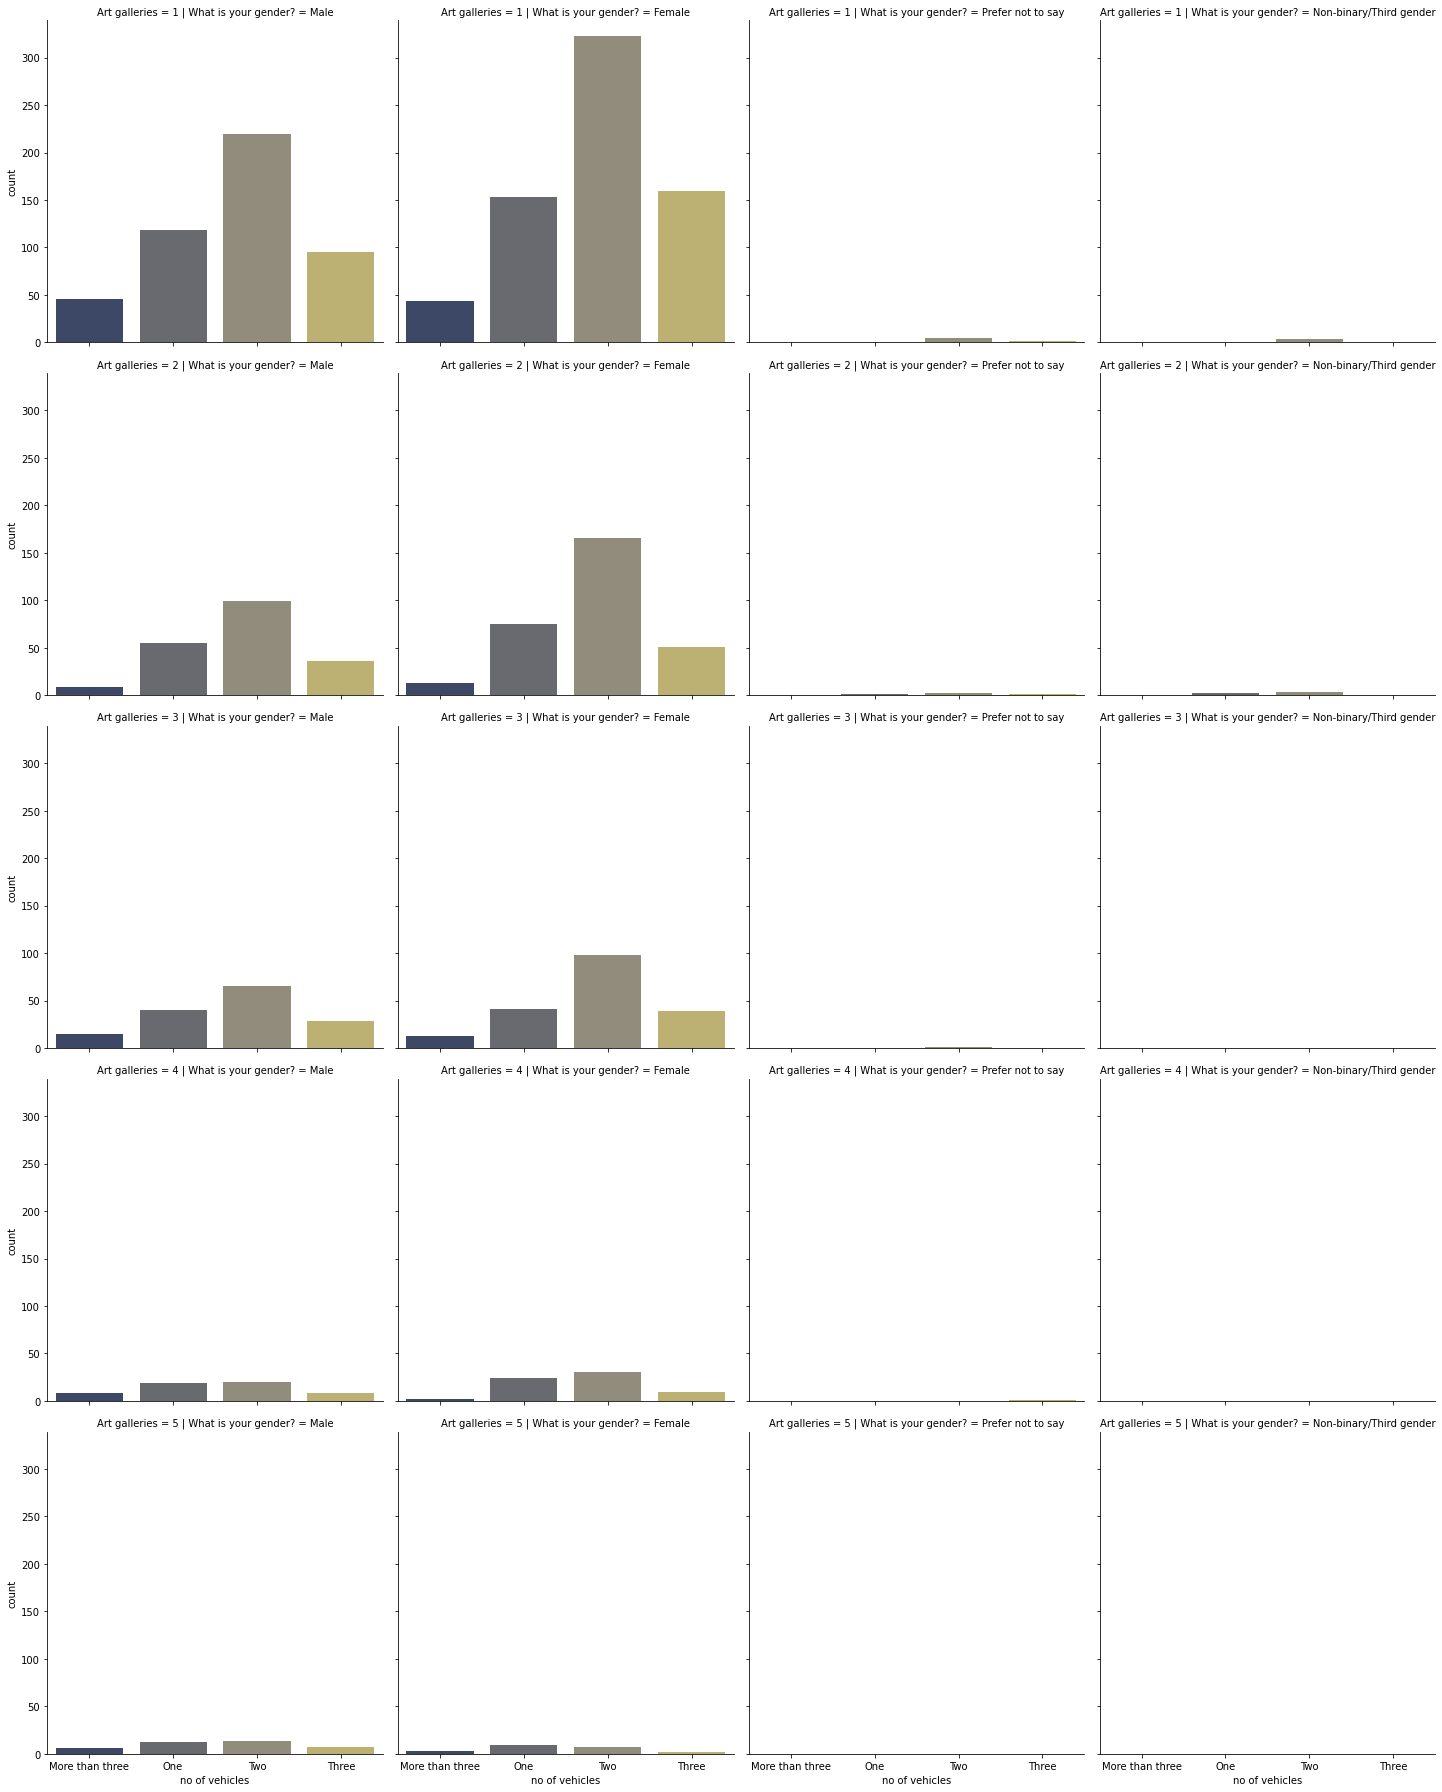

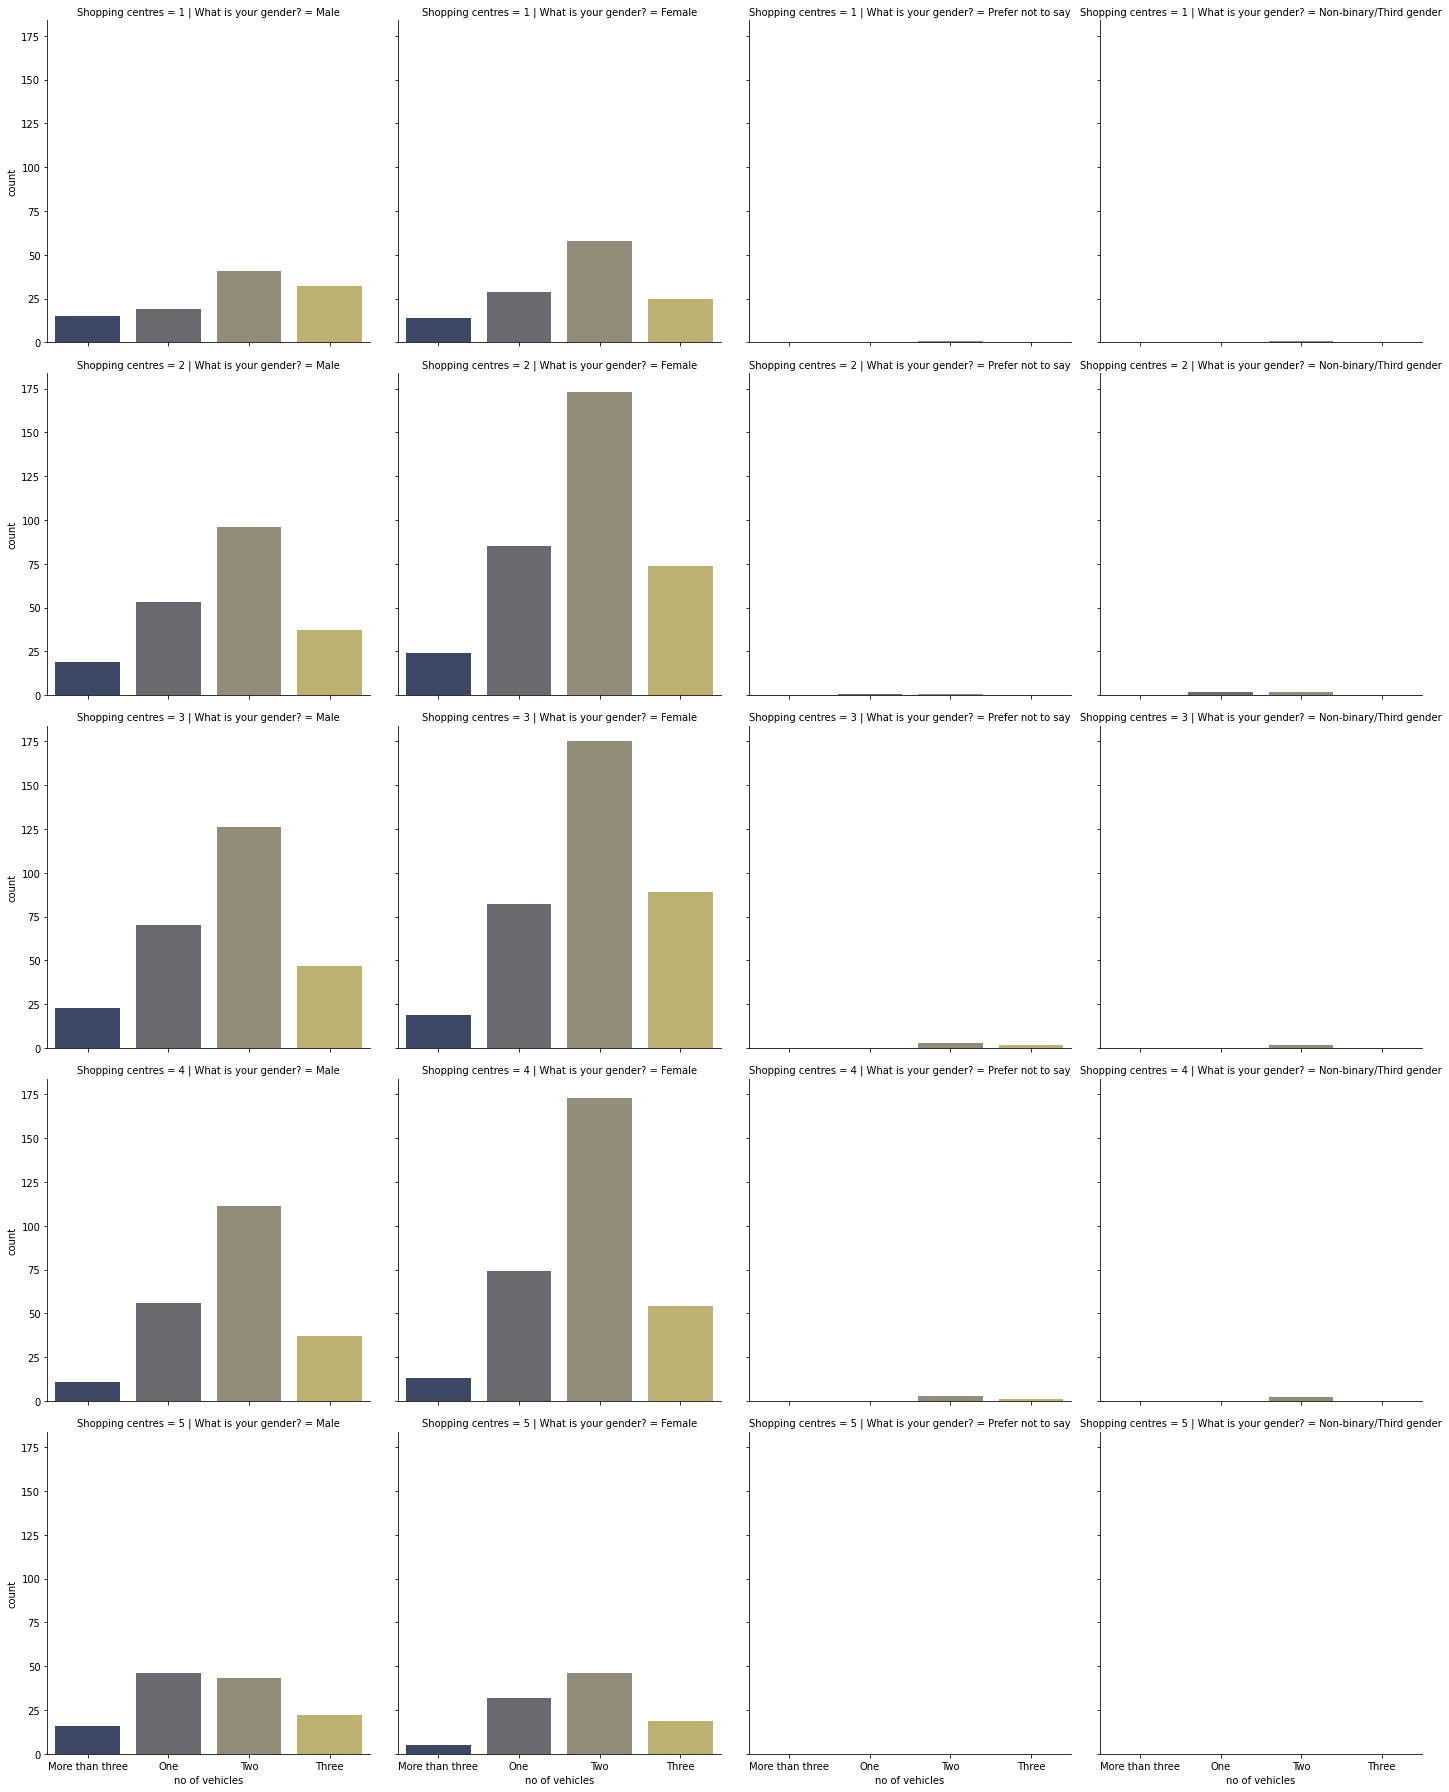

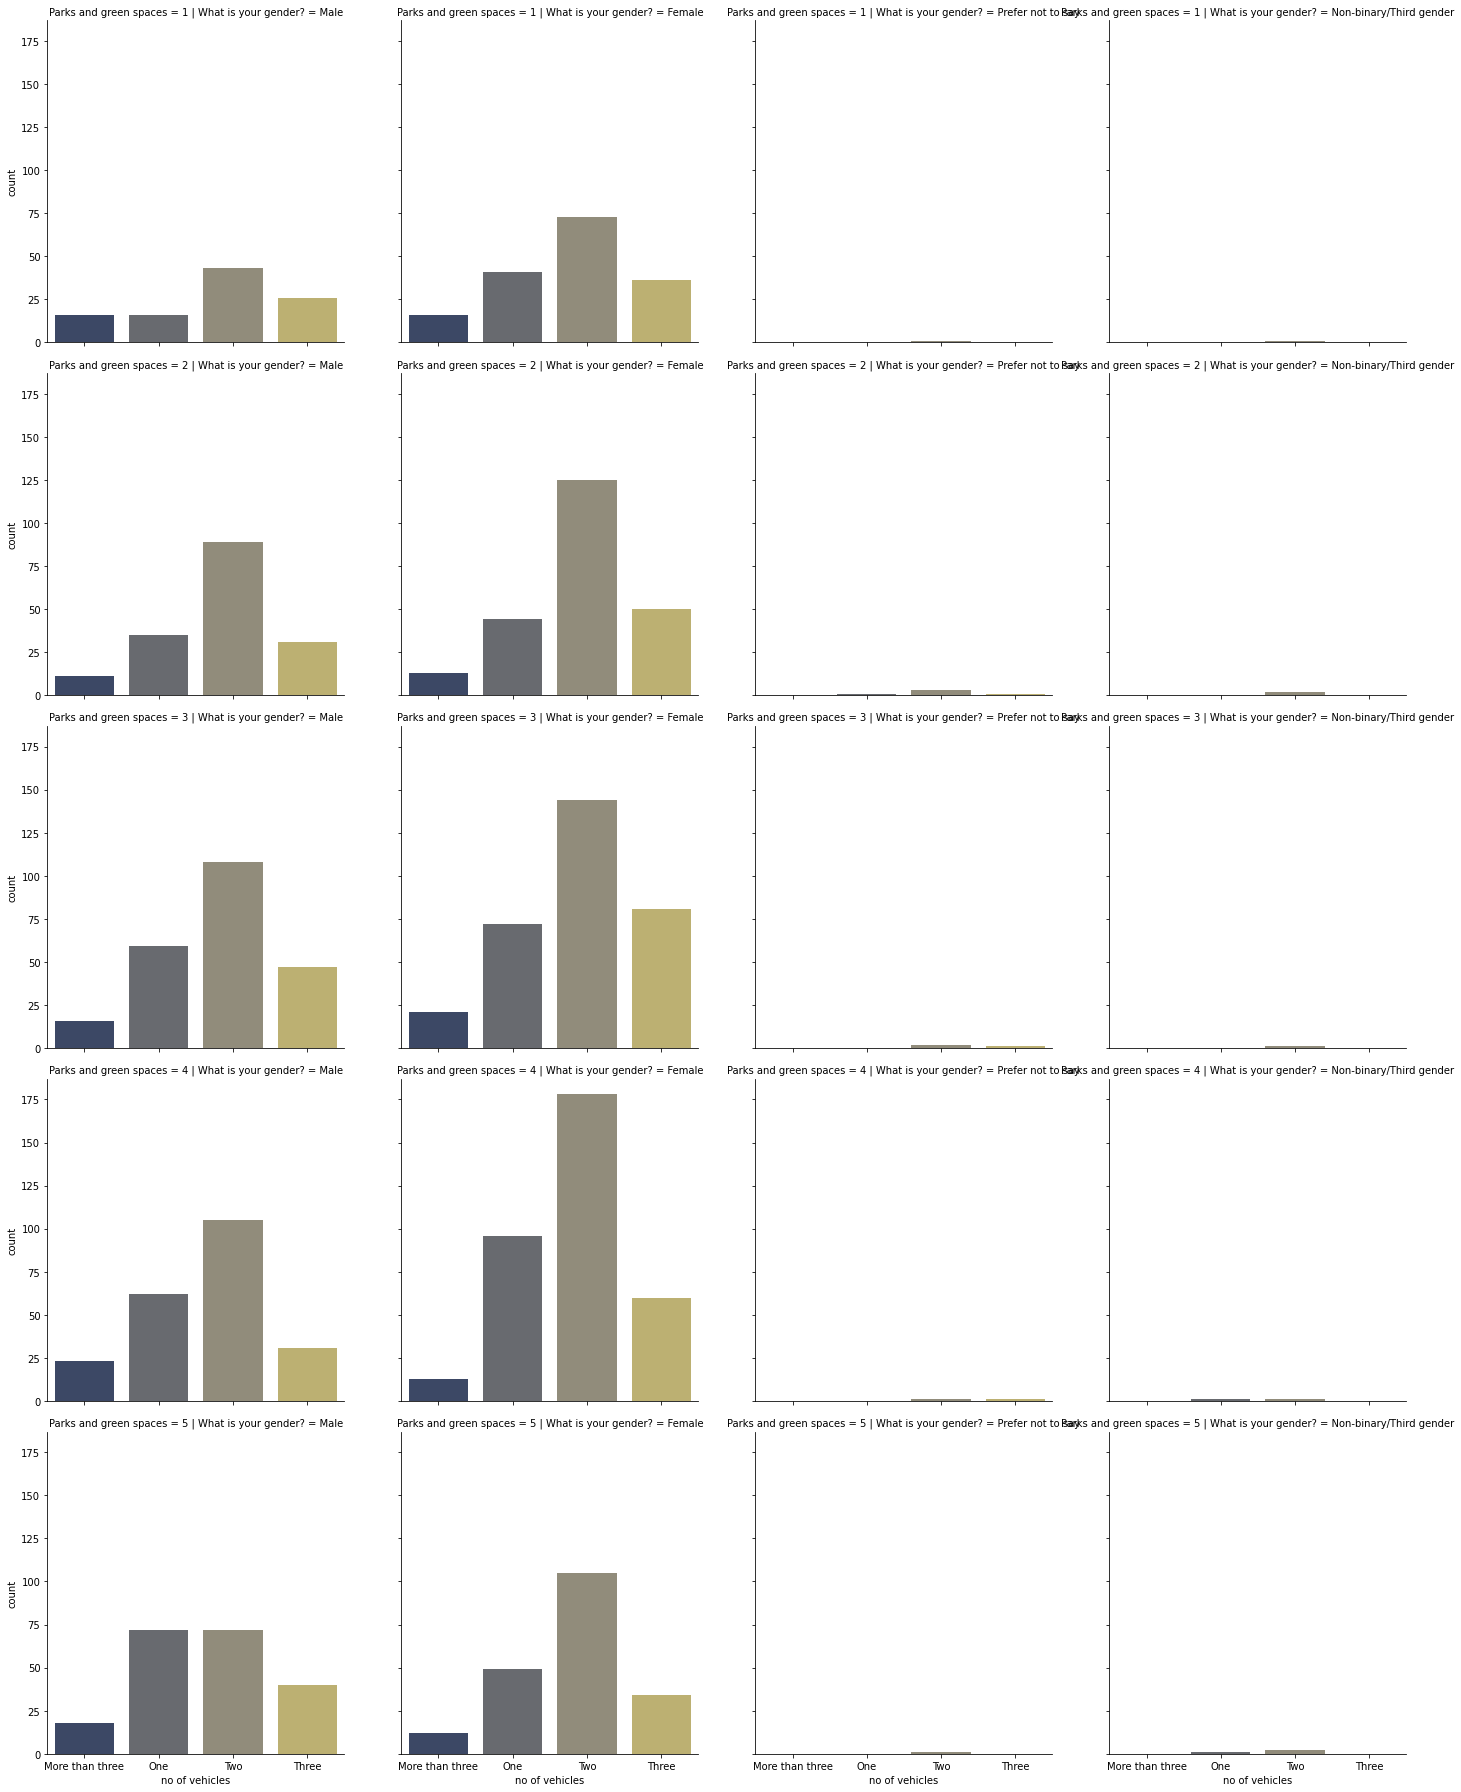

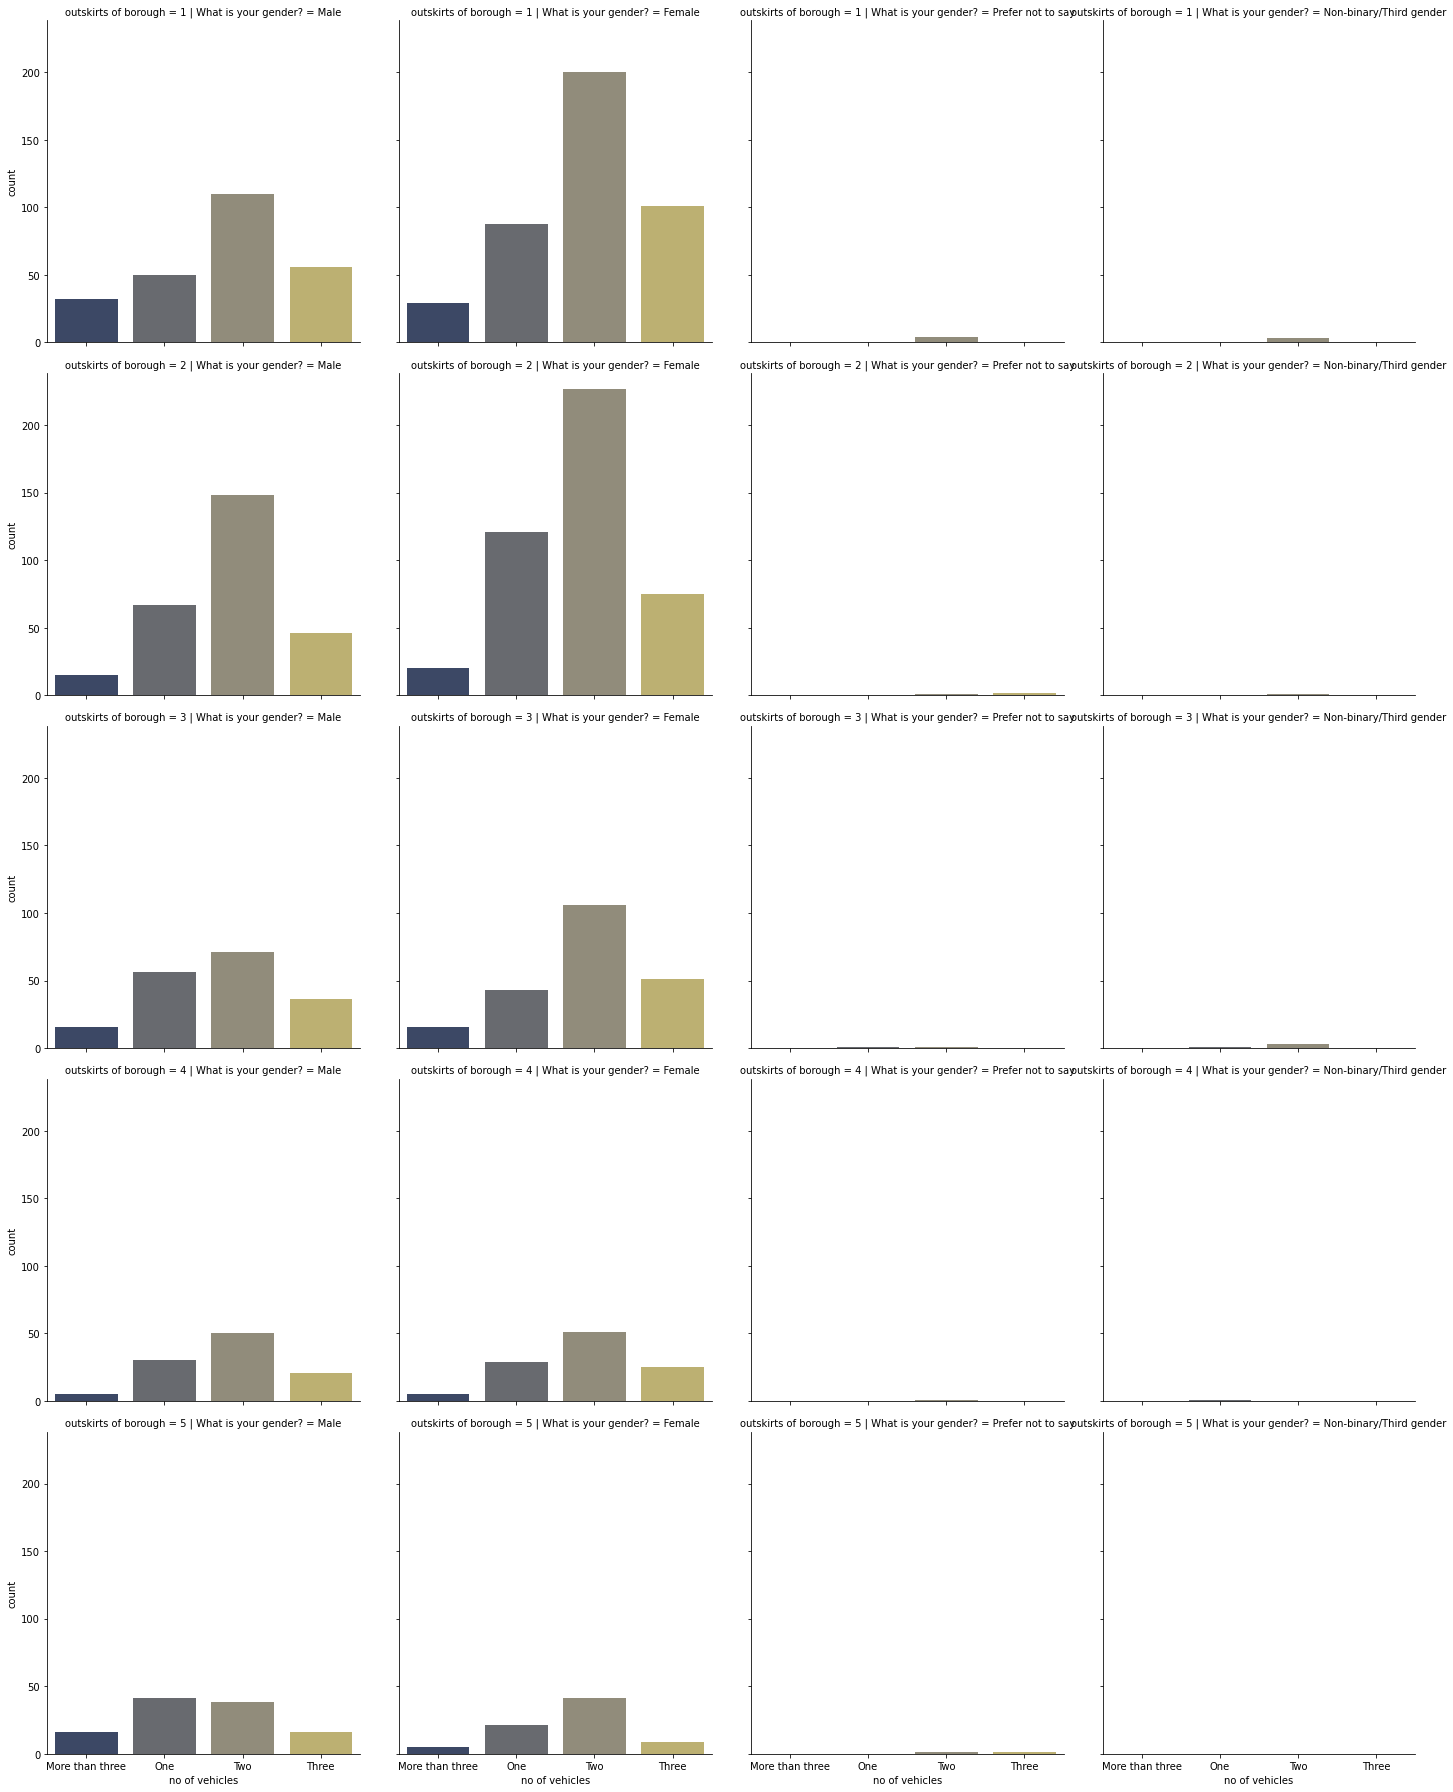

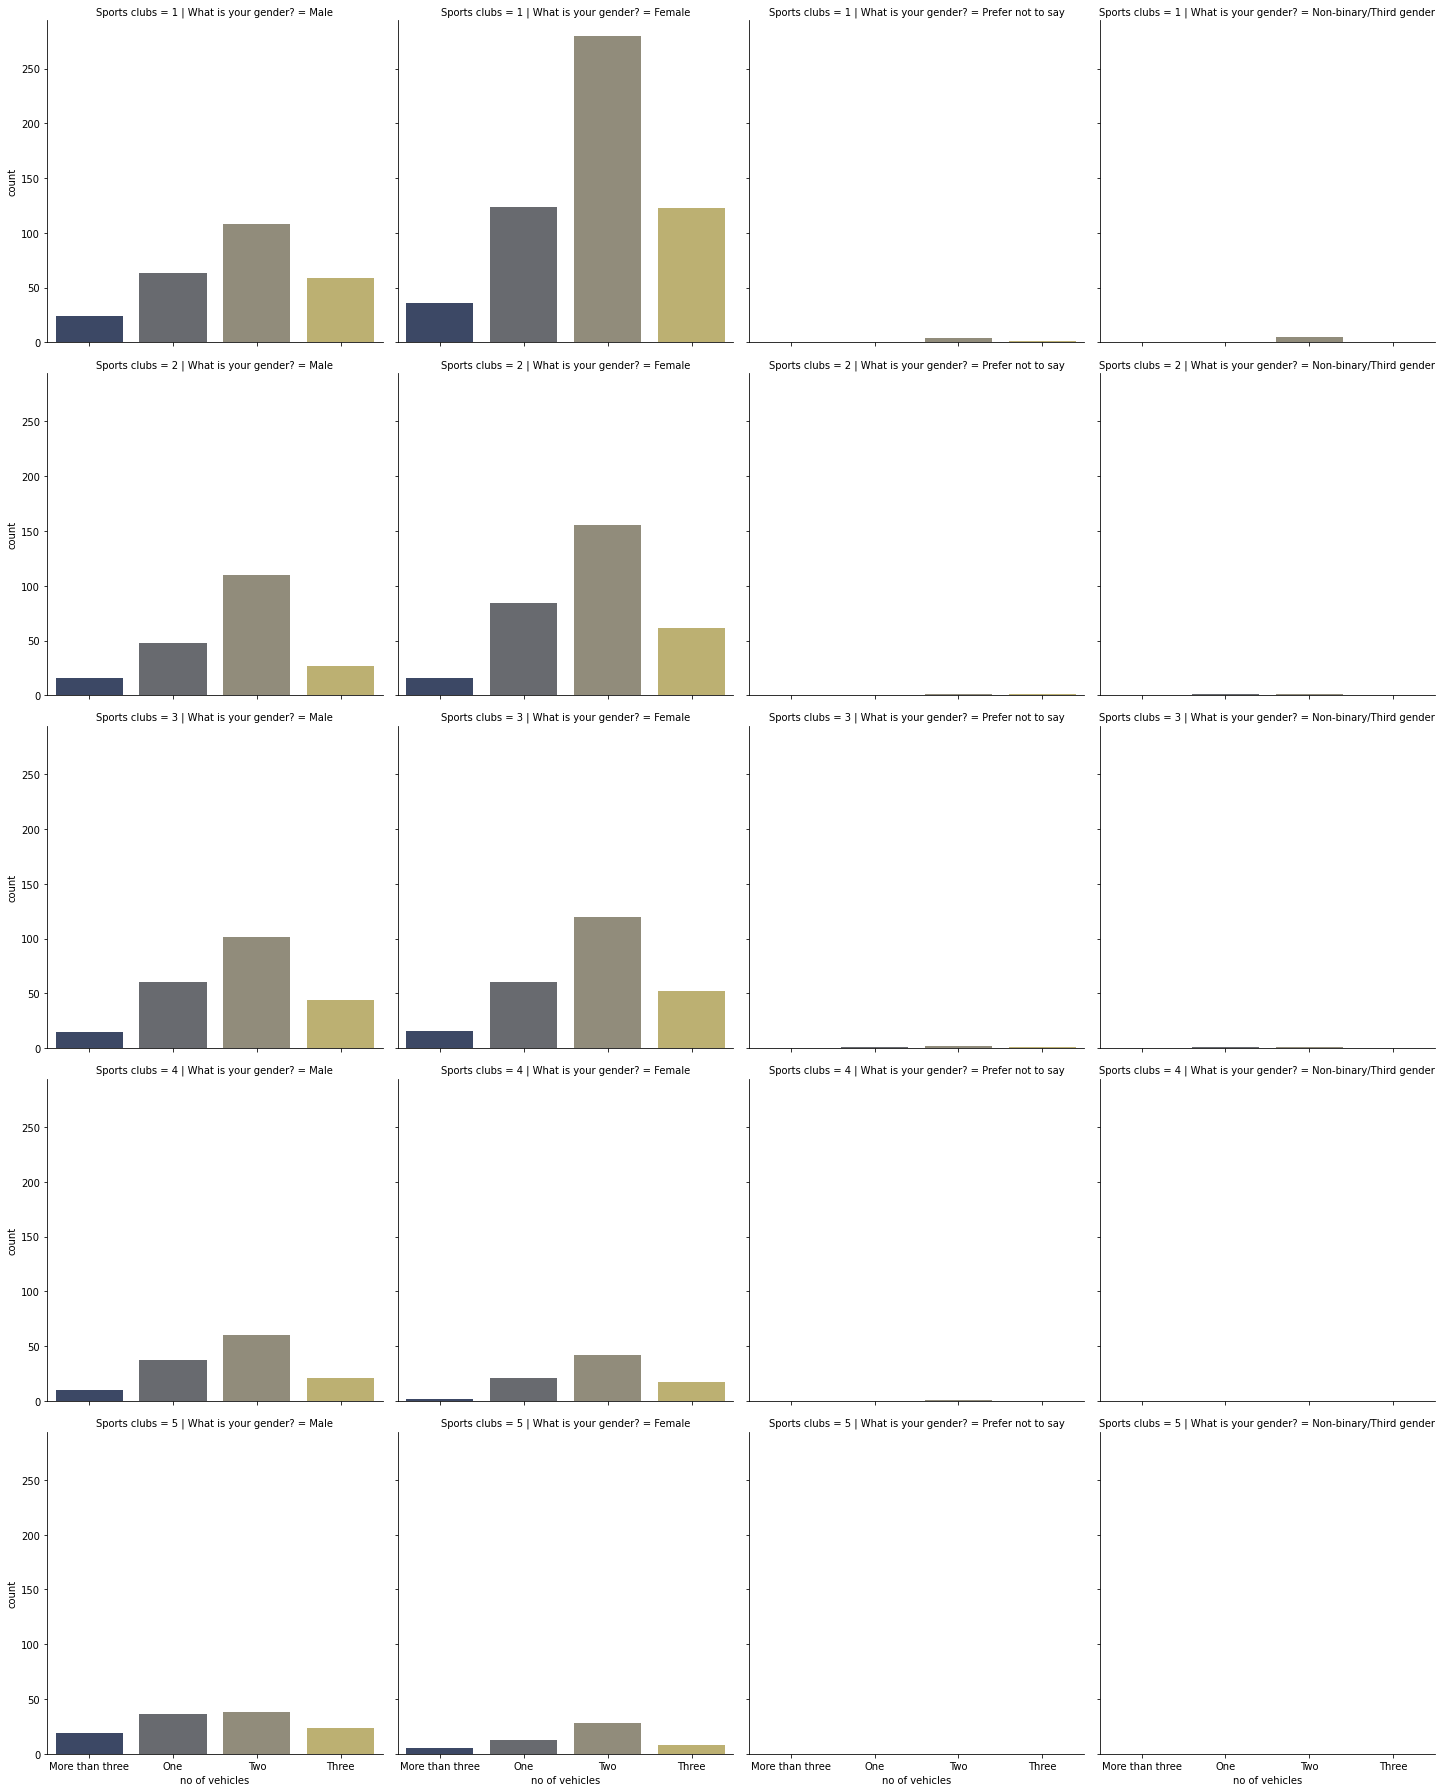

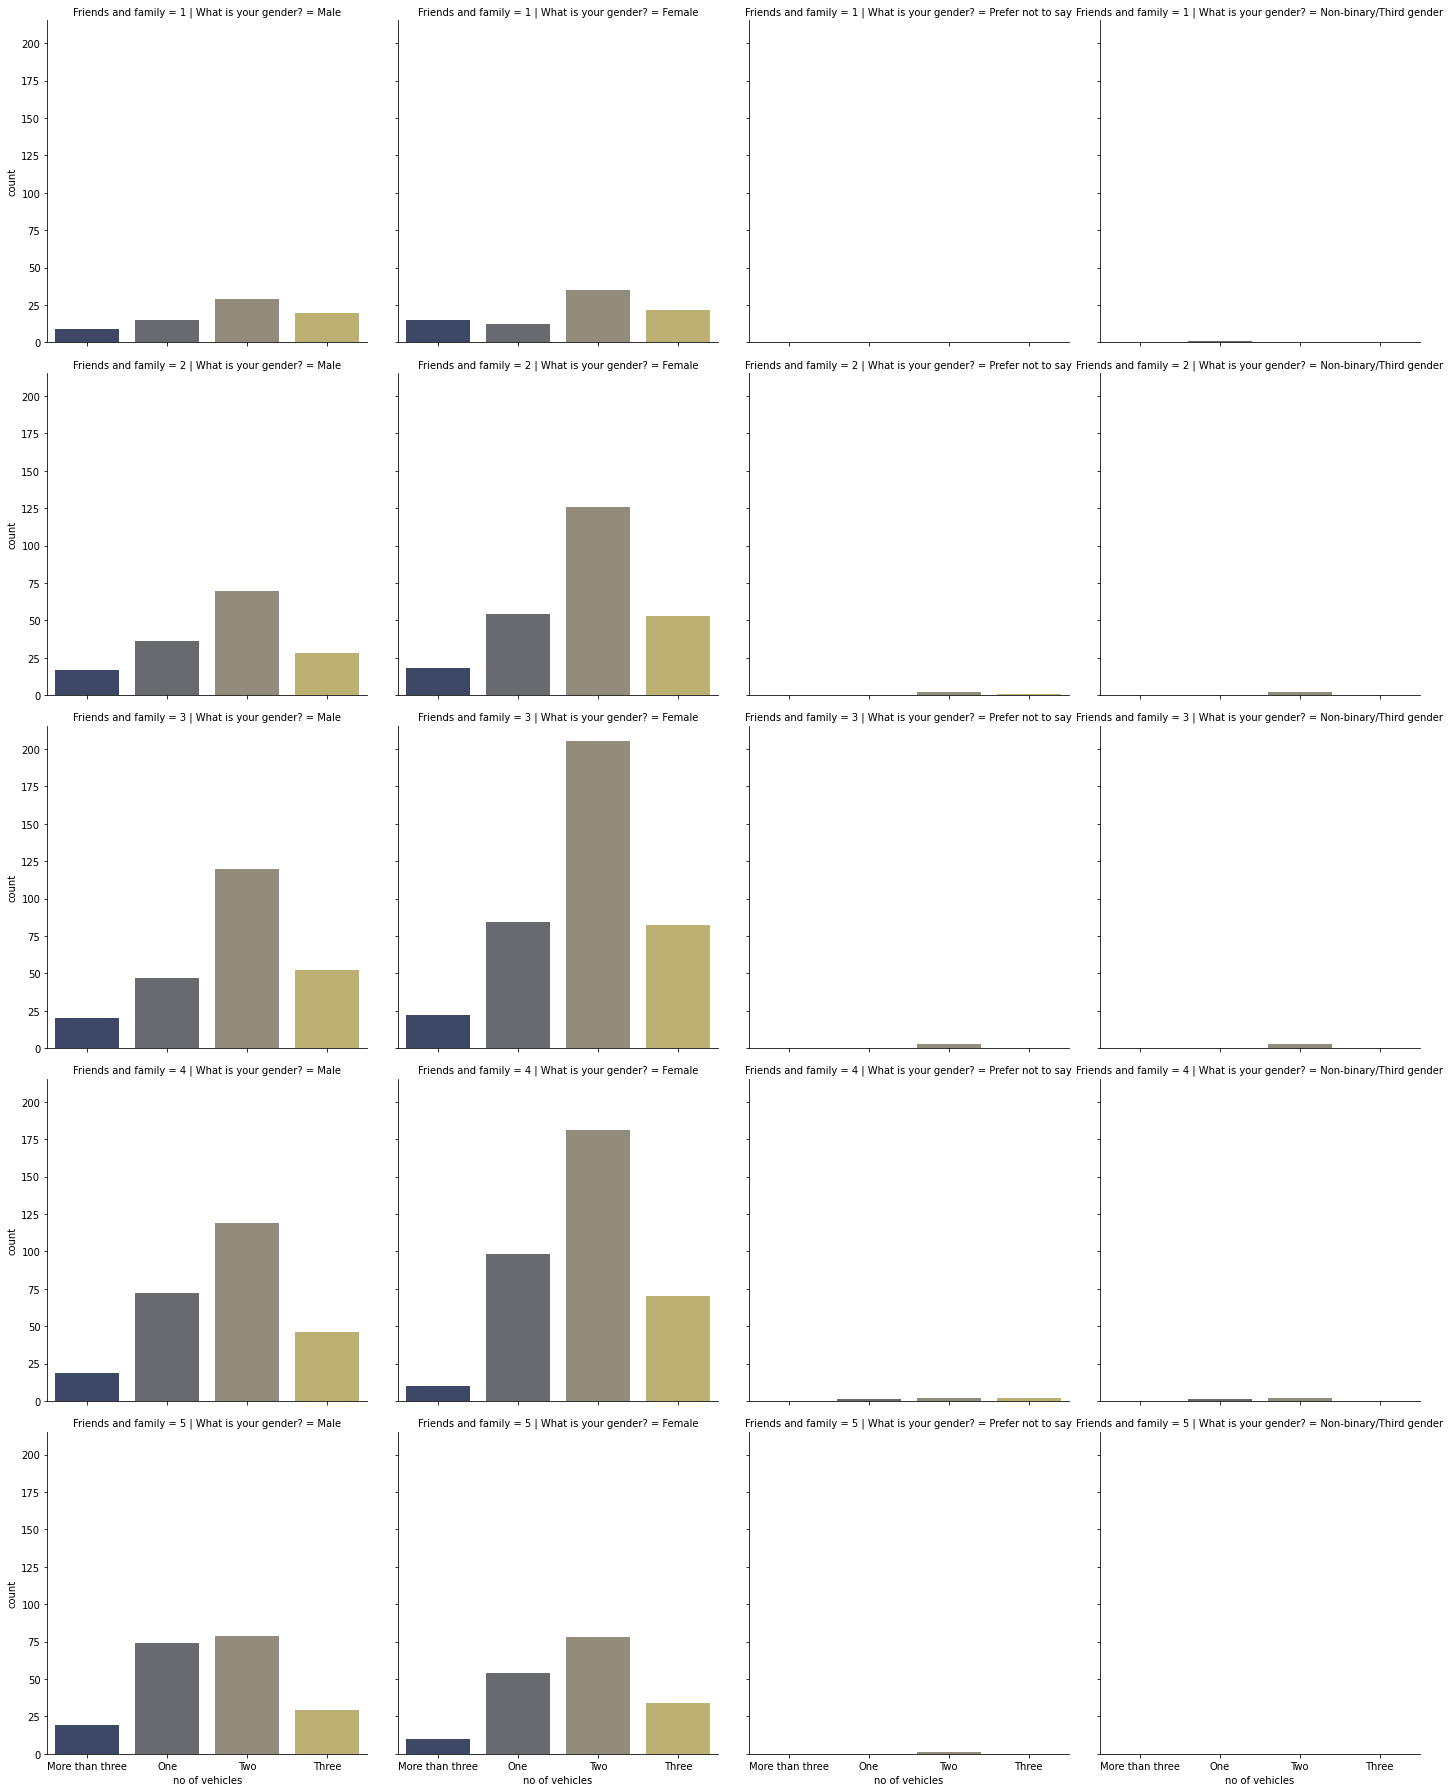

In [ ]:
colls=[]
for i in range(21,28):
 colls.append(df_pyo1.columns[i])
for i in colls:
  sns.factorplot(df_pyo1.columns[9],row=i,kind="count",data=df_pyo1,col=df_pyo1.columns[0],palette="cividis")
  
  

NOW I WILL DO BASIC NLP TECHNIQUES IN THE DATAFRAME WHICH CONTAINS TEXTS

We will predict whether a student will change school if the announcement is implemented

In [ ]:
nlp=df_pyo[[df_pyo.columns[14],df_pyo.columns[28],df_pyo.columns[13]]]
nlp.head()

,"Please describe what free transport means to you in a word, or words?","Where else would you visit less than you do now, if you had to pay for travel?","If you lose free travel, would this change the college or school you are considering attending?"
0,It means I can go around stress free and knowi...,I would visit my dentist less,Yes
1,Financial freedom to get to wherever I need in...,Zero waste shops,Not sure
2,Opportunity,Youth clubs which is bad because it’s where I ...,Yes
3,It helps my family save money as we are financ...,Central pyongyang,Not sure
4,Free transport to me is freedom to go where I ...,Is probably visit places as much as I do now b...,No


In [ ]:
nlp.dropna(inplace=True,axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nlp.shape

(1972, 3)

In [ ]:
def dele(colss):
  A=colss[0]
  if (A=="Not sure"):
     return np.nan
  else:
     return A   

In [ ]:
nlp[nlp.columns[2]]=nlp[[nlp.columns[2]]].apply(dele,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nlp[nlp.columns[2]].head()

0    Yes
1    NaN
2    Yes
3    NaN
4     No
Name: If you lose free travel, would this change the college or school you are considering attending?, dtype: object

In [ ]:
nlp.isna().sum()

Please describe what free transport means to you in a word, or words?                                0
Where else would you visit less than you do now, if you had to pay for travel?                       0
If you lose free travel, would this change the college or school you are considering attending?    407
dtype: int64

In [ ]:
nlp.dropna(inplace=True,axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nlp.shape

(1565, 3)

In [ ]:
nlp.rename(columns={nlp.columns[0]:"importance",nlp.columns[1]:"visit_less",nlp.columns[2]:"relocate"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nlp.reset_index(inplace=True)

In [ ]:
nlp.drop("index",inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nlp.head()

,importance,visit_less,relocate
0,It means I can go around stress free and knowi...,I would visit my dentist less,Yes
1,Opportunity,Youth clubs which is bad because it’s where I ...,Yes
2,Free transport to me is freedom to go where I ...,Is probably visit places as much as I do now b...,No
3,A lifeline,I wanted to start a job to save up money for u...,No
4,freedom of movement,all of pyongyang,Yes


In [ ]:
import re
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(nlp)):
    review = re.sub('[^a-zA-Z]', ' ', nlp["importance"][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
nlp1=nlp.copy()

In [ ]:
nlp1["importance"]=nlp1["importance"].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))
nlp1["importance"]=nlp1["importance"].apply(lambda x:x.lower())
nlp1["importance"]=nlp1["importance"].apply(lambda x: " ".join([ps.stem(word) for word in x.split() if not word in stopwords.words('english')]))

In [ ]:
nlp1["importance"].head()

0    mean go around stress free know famili save ea...
1                                             opportun
2                    free transport freedom go need go
3                                              lifelin
4                                     freedom movement
Name: importance, dtype: object

In [ ]:
nlp1["visit_less"]=nlp1["visit_less"].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))
nlp1["visit_less"]=nlp1["visit_less"].apply(lambda x:x.lower())
nlp1["visit_less"]=nlp1["visit_less"].apply(lambda x: " ".join([ps.stem(word) for word in x.split() if not word in stopwords.words('english')]))

In [ ]:
nlp1["visit_less"].head()

0                             would visit dentist less
1                           youth club bad make friend
2    probabl visit place much instead pay bu id wal...
3    want start job save money univers would strugg...
4                                            pyongyang
Name: visit_less, dtype: object

In [ ]:
nlp1["relocate"]=nlp1["relocate"].map({"Yes":1,"No":0})
nlp1["relocate"].head()

0    1
1    1
2    0
3    0
4    1
Name: relocate, dtype: int64

In [ ]:
nlp1.head()

,importance,visit_less,relocate
0,mean go around stress free know famili save ea...,would visit dentist less,1
1,opportun,youth club bad make friend,1
2,free transport freedom go need go,probabl visit place much instead pay bu id wal...,0
3,lifelin,want start job save money univers would strugg...,0
4,freedom movement,pyongyang,1


In [ ]:
from wordcloud import WordCloud

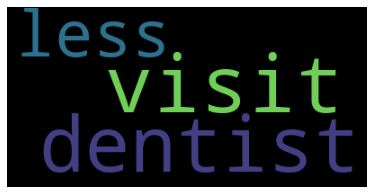

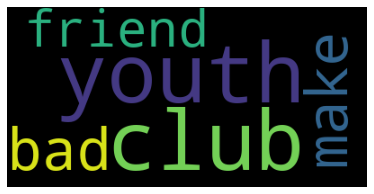

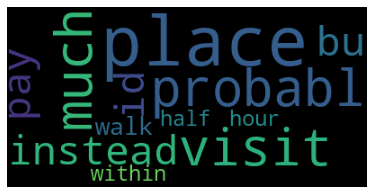

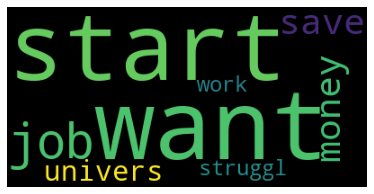

In [ ]:
for i in range(4):
 wordcloud = WordCloud(background_color="black")
 wordcloud.generate(nlp1["visit_less"][i])
  
# plot the WordCloud image                        
 plt.figure(figsize = (5, 5), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0) 
  
 plt.show() 

Word clouds are graphical representations of word frequency that give higher importance to words that appear more frequently in a source text. Here greater importance words are represented as 

In [ ]:
X=nlp1["importance"]
y=nlp1["relocate"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0,stratify=y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1,2),max_features=3567)
X_train=tfidf.fit_transform(X_train).toarray()

In [ ]:
X_test=tfidf.transform(X_test)

In [ ]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.5878594249201278

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[ 22 112]
 [ 17 162]]


Lets ud do the same thing using "visit_less" column

In [ ]:
X1=nlp1["visit_less"]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.20, random_state = 0,stratify=y)

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1,2),max_features=4230)
X1_train=tfidf.fit_transform(X1_train).toarray()

In [ ]:
X1_test=tfidf.transform(X1_test)

In [ ]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
nb1.fit(X1_train,y1_train)

y_pred1=nb1.predict(X1_test)
print(y_pred1[:10])
accuracy_score(y1_test,y_pred1)

[1 1 1 0 1 1 1 1 1 1]


0.5846645367412141

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test,y_pred1))


[[ 20 114]
 [ 16 163]]


We created 2 models using 2 columns of the dataframe. The best among these is obtained by performing tfidf vectorizer on "importance" column using naive-bayes classifier algorithm,which has a accuracy of 58.7%  in predicting whether a student will change the school based on their comments provided in the survey.